![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/Spark_NLP_Udemy_MOOC/Healthcare_NLP/Router.ipynb)

# **Router**

This notebook will cover the different parameters and usages of `Router`. This annotator provides the ability to split an output of an annotator for a selected metadata field and the value for that field.

**📖 Learning Objectives:**

1. Using `Router` annotators' parameters to get desired outputs
2. Using `Router` for optimizing getting sentence embeddings and multiple sentence entity resolver models.  


**🔗 Helpful Links:**

- Documentation : [Router](https://nlp.johnsnowlabs.com/docs/en/licensed_annotators#router)

- Python Docs : [Router](https://nlp.johnsnowlabs.com/licensed/api/python/reference/autosummary/sparknlp_jsl/annotator/router/index.html#module-sparknlp_jsl.annotator.router)

- Scala Docs : [Router](https://nlp.johnsnowlabs.com/licensed/api/com/johnsnowlabs/annotator/Router.html)

- For extended examples of usage, see the [Spark NLP Workshop repository](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/05.0.Clinical_Entity_Resolvers.ipynb).

## **📜 Background**


When we need to use multiple sentence entity resolver models in the same pipeline, we typically had to run the `BertSentenceEmbeddings` annotator multiple times based on the number of resolver models. This meant that the heavy process of generating sentence embeddings using BERT was repeated multiple times.

To address this issue, Spark NLP Healthcare Library has introduced a solution using the `Router` annotator. With this new approach, we can provide all the named entity recognition (NER) chunks to the `BertSentenceEmbeddings` annotator at once. The annotator generates the sentence embeddings for all the chunks together. Then, the output of the sentence embeddings is routed to the specific resolver models that are required for further processing.

This solution eliminates the need to run `BertSentenceEmbeddings` multiple times, reducing the computational overhead and improving the efficiency of the pipeline.


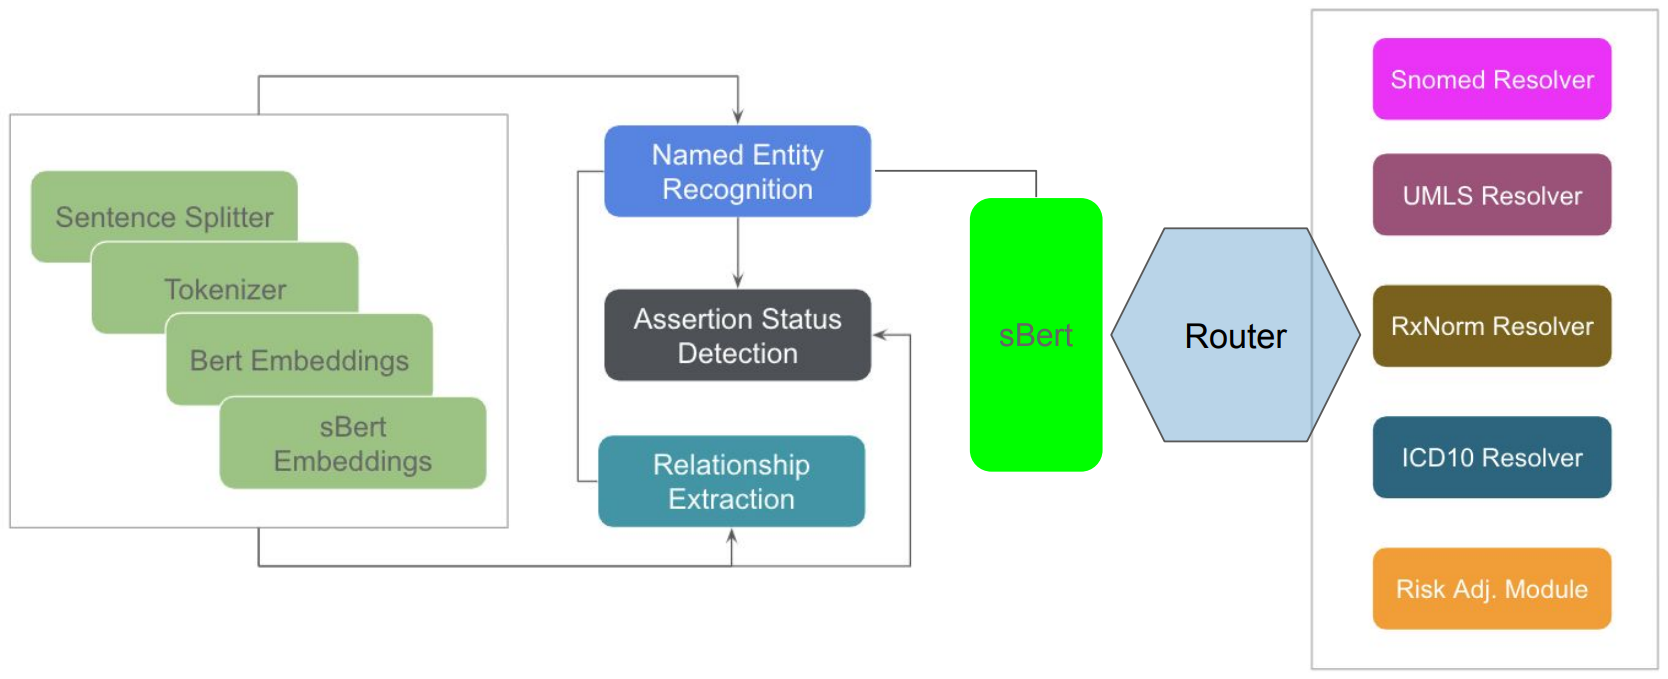

## **🎬 Colab Setup**

In [ ]:
!pip install -q johnsnowlabs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.2/676.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 587.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

Please Upload your John Snow Labs License using the button below


Saving spark_nlp_for_healthcare_spark_ocr_8734_532.json to spark_nlp_for_healthcare_spark_ocr_8734_532.json


In [ ]:
from johnsnowlabs import nlp, medical

nlp.install()

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_8734_532.json
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_8734_532.json
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-5.3.2-py3-none-any.whl to /usr/bin/python3
Installed 1 products:
💊 Spark-Healthcare==5.3.2 installed! ✅ Heal the planet with NLP! 


In [ ]:
spark = nlp.start()
spark

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_8734_532.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.3.2, 💊Spark-Healthcare==5.3.2, running on ⚡ PySpark==3.4.0


## **🖨️ Input/Output Annotation Types**

- Input: `ENTITY` ,`LABEL_DEPENDENCY`

- Output: `ENTITY`

## **🔎 Parameters**


- `inputCols`: The name of the columns containing the input annotations. It can read an Array of strings.
- `outputCol`: The name of the column in the Document type that is generated. We can specify only one column here.
- `inputType`: The type of entity that you want to filter (by default `sentence_embeddings`). Possible values; `document|token|wordpiece|word_embeddings|sentence_embeddings|category|date|sentiment|pos|chunk|named_entity|regex|dependency|labeled_dependency|language|keyword`
- `metadataField`: The key in the metadata dictionary that you want to filter (by default `entity`)
- `filterFieldsElements`: The `filterfieldsElements` are the allowed values for the metadata field that is being used.

All the parameters can be set using the corresponding set method in the camel case. For example, `.setInputcols()`.

## Merging Resolver and Mappper Entities

In the below example, let's use the `sbiobertresolve_rxnorm` RxNorm model and the `sbiobertresolve_icd10cm_slim_billable_hcc` ICD10CM-HCC models together. First, we will get the `PROBLEM` entities from the `ner_clinical` model and then get the `DRUG` entities from the `ner_posology` model. Then we will merge them and use the `Chunk2Doc` annotator to create sentence chunks to populate the Sentence Embeddings column. Then, we route the embeddings of `PROBLEM` entities to the ICD10CM model and embeddings of `DRUG` entities to the RxNorm model at the same time.

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols("document")\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols("sentence")\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token")\
    .setOutputCol("word_embeddings")

# to get PROBLEM entities
clinical_ner = medical.NerModel().pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_chunk = medical.NerConverterInternal()\
    .setInputCols("sentence","token","clinical_ner")\
    .setOutputCol("clinical_ner_chunk")\
    .setWhiteList(["PROBLEM"])

# to get DRUG entities
posology_ner = medical.NerModel().pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_chunk = medical.NerConverterInternal()\
    .setInputCols("sentence","token","posology_ner")\
    .setOutputCol("posology_ner_chunk")\
    .setWhiteList(["DRUG"])

# merge the chunks into a single ner_chunk
chunk_merger = medical.ChunkMergeApproach()\
    .setInputCols("clinical_ner_chunk","posology_ner_chunk")\
    .setOutputCol("final_ner_chunk")\
    .setMergeOverlapping(False)


# convert chunks to doc to get sentence embeddings of them
chunk2doc = nlp.Chunk2Doc().setInputCols("final_ner_chunk").setOutputCol("doc_final_chunk")


sbiobert_embeddings = nlp.BertSentenceEmbeddings.pretrained("sbiobert_base_cased_mli","en","clinical/models")\
    .setInputCols(["doc_final_chunk"])\
    .setOutputCol("sbert_embeddings")\
    .setCaseSensitive(False)

# filter PROBLEM entity embeddings
router_sentence_icd10 = medical.Router() \
    .setInputCols("sbert_embeddings") \
    .setFilterFieldsElements(["PROBLEM"]) \
    .setOutputCol("problem_embeddings")

# filter DRUG entity embeddings
router_sentence_rxnorm = medical.Router() \
    .setInputCols("sbert_embeddings") \
    .setFilterFieldsElements(["DRUG"]) \
    .setOutputCol("drug_embeddings")

# use problem_embeddings only
icd_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_slim_billable_hcc","en", "clinical/models") \
    .setInputCols(["problem_embeddings"]) \
    .setOutputCol("icd10cm_code")\
    .setDistanceFunction("EUCLIDEAN")


# use drug_embeddings only
rxnorm_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_rxnorm_augmented","en", "clinical/models") \
    .setInputCols(["drug_embeddings"]) \
    .setOutputCol("rxnorm_code")\
    .setDistanceFunction("EUCLIDEAN")


pipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    clinical_ner_chunk,
    posology_ner,
    posology_ner_chunk,
    chunk_merger,
    chunk2doc,
    sbiobert_embeddings,
    router_sentence_icd10,
    router_sentence_rxnorm,
    icd_resolver,
    rxnorm_resolver
])

empty_data = spark.createDataFrame([['']]).toDF("text")
model = pipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical download started this may take some time.
[OK!]
ner_posology download started this may take some time.
[OK!]
sbiobert_base_cased_mli download started this may take some time.
Approximate size to download 384.3 MB
[OK!]
sbiobertresolve_icd10cm_slim_billable_hcc download started this may take some time.
[OK!]
sbiobertresolve_rxnorm_augmented download started this may take some time.
[OK!]


In [ ]:
clinical_note = """The patient is a 41-year-old Vietnamese female with a cough that started last week.
She has had right-sided chest pain radiating to her back with fever starting yesterday.
She has a history of pericarditis in May 2006 and developed cough with right-sided chest pain.
MEDICATIONS
1. Coumadin 1 mg daily. Last INR was on Tuesday, August 14, 2007, and her INR was 2.3.
2. Amiodarone 100 mg p.o. daily.
"""

In [ ]:
df = spark.createDataFrame([[clinical_note]]).toDF("text")

result = model.transform(df)

In [ ]:
result.selectExpr(
    "final_ner_chunk.result as chunk",
    "posology_ner_chunk.result as posology_chunk",
    "rxnorm_code.result as rxnorm_code",
    "clinical_ner_chunk.result as clinical_chunk",
    "icd10cm_code.result as icd10cm_code",

).show(truncate=False)

+-----------------------------------------------------------------------------------------------------------+----------------------+-------------+-------------------------------------------------------------------------------------+--------------------------------------+
|chunk                                                                                                      |posology_chunk        |rxnorm_code  |clinical_chunk                                                                       |icd10cm_code                          |
+-----------------------------------------------------------------------------------------------------------+----------------------+-------------+-------------------------------------------------------------------------------------+--------------------------------------+
|[a cough, right-sided chest pain, fever, pericarditis, cough, right-sided chest pain, Coumadin, Amiodarone]|[Coumadin, Amiodarone]|[202421, 703]|[a cough, right-sided chest pain, feve

## filterFieldsElements & metadataField

This is the filtering parameter for entities. We select the metadata field key to be filtered with `metadataField` and we set value(s) for that key with `filterFieldsElements`.

In [ ]:
result.select("sbert_embeddings.metadata").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Below using `metadataField` we set "entity" field from metafield dictionary, and set value "PROBLEM" using `FilterFieldsElements` for selected "entity" key. "PROBLEM" entity is originally coming from ner_clinical model.

In [ ]:
router_sentence_icd10 = medical.Router() \
    .setInputCols("sbert_embeddings") \
    .setMetadataField("entity")\
    .setFilterFieldsElements(["PROBLEM"]) \
    .setOutputCol("problem_embeddings")

## inputType

The type of entity that you want to filter (by default `sentence_embeddings`). Possible values; `document|token|wordpiece|word_embeddings|sentence_embeddings|category|date|sentiment|pos|chunk|named_entity|regex|dependency|labeled_dependency|language|keyword`

In [ ]:
router_sentence_icd10 = medical.Router() \
    .setInputCols("sbert_embeddings") \
    .setInputType("sentence_embeddings")\
    .setMetadataField("entity")\
    .setFilterFieldsElements(["PROBLEM"]) \
    .setOutputCol("problem_embeddings")